In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Jodhpur.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,New Raja Chicken Corner,500,"Mughlai,North Indian",Jodhpur,Station Road,Quick Bites,1130am to 11pm(Mon-Sun),Very Good,4.2,505
1,Naveen Juice And Ice Cream Parlour,400,"Beverages,Fast Food",Jodhpur,Shastri Nagar,Beverage Shop,9am to 11pm(Mon-Sun),Very Good,4.0,316
2,Gurunanak Lassi Bhandar,100,Beverages,Jodhpur,Sardarpura,Beverage Shop,7am to 1130pm(Mon-Sun),Very Good,4.3,448
3,Gypsy Dining Hall,600,Rajasthani,Jodhpur,Sardarpura,Casual Dining,"12noon to 330pm,7pm to 11pm(Mon-Sun)",Excellent,4.5,301
4,Jantawala Sweets & Restaurant,400,"North Indian,Mithai",Jodhpur,Sardarpura,Casual Dining,7am to 1030pm(Mon-Sun),Very Good,4.0,250


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 10 columns):
Name                337 non-null object
Price               337 non-null int64
Cuisine_Category    336 non-null object
City                337 non-null object
Region              337 non-null object
Cuisine_Type        337 non-null object
Timing              337 non-null object
Rating_Types        337 non-null object
Rating              337 non-null float64
Votes               337 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 26.4+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,337.000000,337.000000,337.000000
mean,359.020772,3.494065,46.121662
std,241.561000,0.405425,70.927613
min,0.000000,2.400000,4.000000
25%,200.000000,3.200000,9.000000
50%,300.000000,3.500000,20.000000
75%,500.000000,3.800000,49.000000
max,2000.000000,4.900000,505.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    1
City                0
Region              0
Cuisine_Type        0
Timing              0
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Ice Cream Works          3
Rawat Misthan Bhandar    2
The Book Cafe            2
The Jeeman Restaurant    2
Goli                     2
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Sardarpura                108
Paota                      42
Ratanada                   32
Shastri Nagar              30
Chopasni Housing Board     28
Air Force Area             19
Basni                      16
Cantt Area                 13
Kabir Nagar                12
Pal Gaon                   11
Name: Region, dtype: int64

Text(0.5,1,'Region')

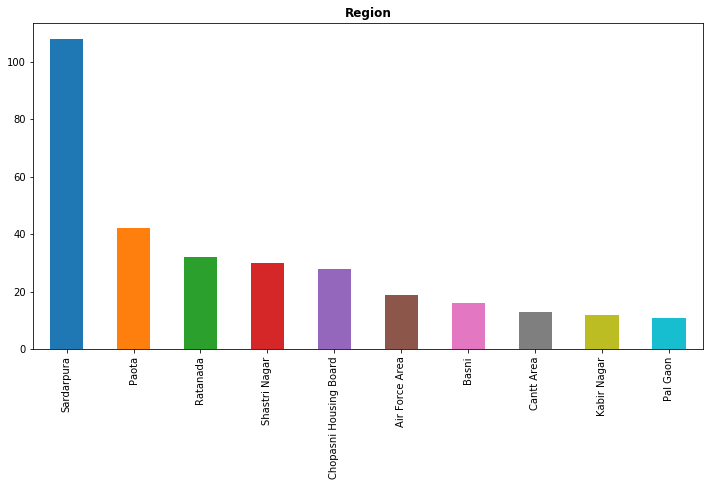

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

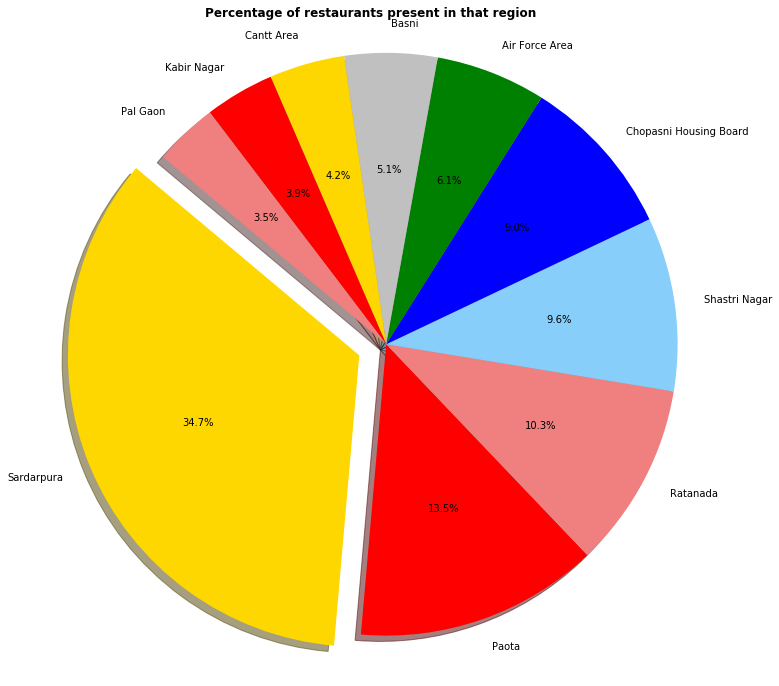

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average      158
Good         132
Very Good     40
Excellent      6
Poor           1
Name: Rating_Types, dtype: int64

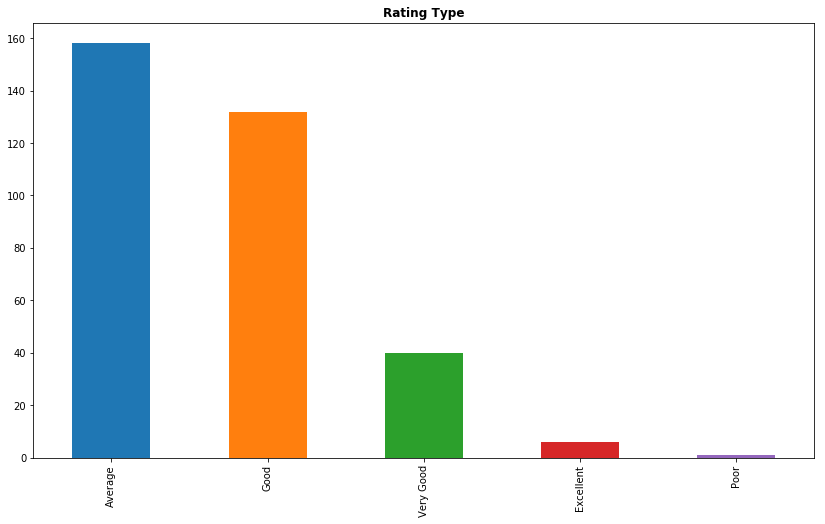

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       156
Casual Dining      64
Café               27
Sweet Shop         17
none               17
Beverage Shop      16
Bakery             14
Dessert Parlor     11
Bhojanalya          3
Fine Dining         3
Name: Cuisine_Type, dtype: int64

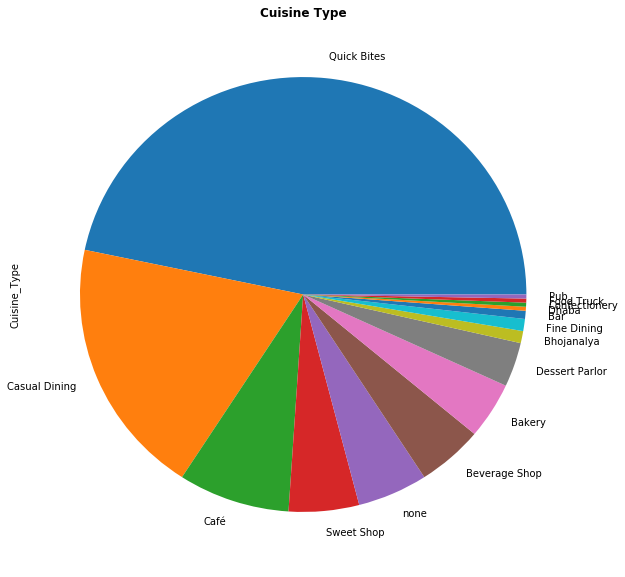

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.495535714285716


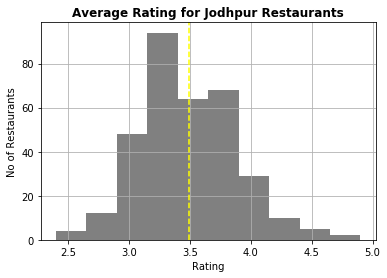

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Jodhpur Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [21]:
#Average rating per restaurant in Jodhpur is found to be around 3.5

# Top cuisines in Jodhpur

In [22]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

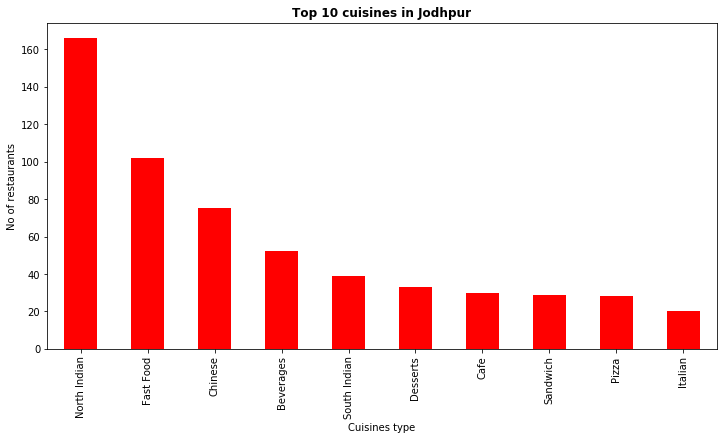

In [23]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Jodhpur',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [24]:
data['Price'].value_counts()[:20]

400     49
200     44
500     38
300     38
150     36
100     32
250     30
600     21
350     14
700      7
800      5
1000     4
450      3
550      3
900      2
1200     2
1500     2
950      1
750      1
2000     1
Name: Price, dtype: int64

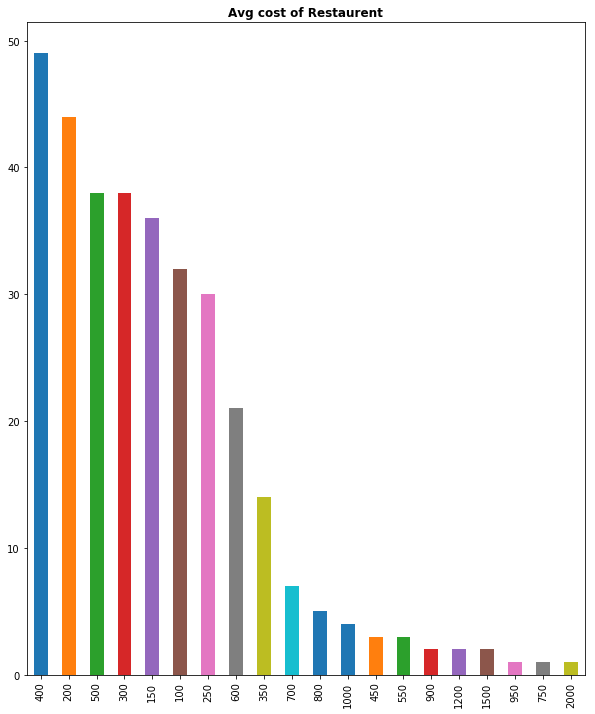

In [25]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [26]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

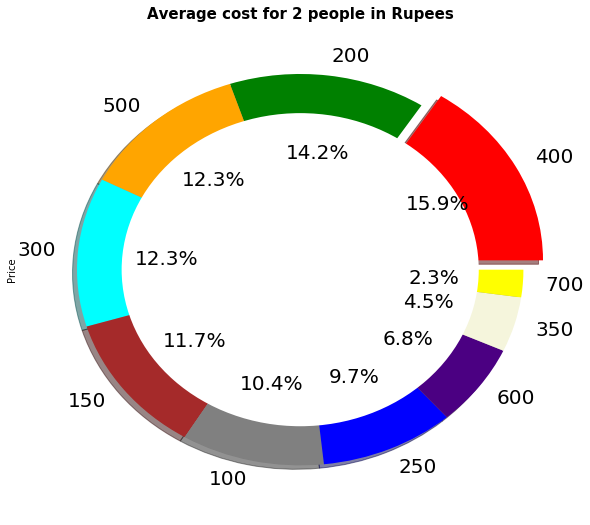

In [27]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 400